# APPLIED DATA SCIENCE CAPSTONE PROJECT: The Rise Of Pixel
## Om Singh

### Background Information
Google is the owner of Android, the world’s most popular mobile operating system. According to Stat Counter android roughly makes up 73% of the market, well ahead of its nearest competitor, Apple’s IOS. However, Google’s individual phones, its infamous pixel lineup, has an overwhelmingly lack of popularity amongst users, as can be seen through Stat Counters data which suggest Google Pixel Phones have less than 1.5% market share.  This could be attributed to its lack of physical stores, something which its competitors such as Apple and Samsung have around the globe. Google recently opened a store in New York City, and they are looking to expand these stores, however. 
Infect, Google’s and its investors are currently putting in tons of money into the company for the launch of their next phone and other hardware, as shown by how Google’s head of hardware Rick Osterloh, that they “are ready to invest a lot in marketing”, and through T-Mobile’s recent announcement to invest heavily into Google Pixel.  Due to countries such as the USA and Canada opening due to its large amounts of vaccine doses, sales of technology and mobile phones are currently on the rise as people flock back into on site retail stores, and hence it is natural that Google wishes to expand its meagre sales by building retail store. 


### Research Question
Hence arises the question for Google, where to from here? Where should Google open its next physical retail store. Hence the question for my data science project is formed: 
“Where in Toronto should Google open its next physical retail store”? 
This what I will answer in this report. 

First we must begin with importing the libraries needed for this project

In [171]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
!pip install geopy==2.2.0
from geopy.geocoders import Nominatim 
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!pip install folium
import folium
!pip install pyproj
import pyproj
import matplotlib.pyplot as plt
print('Libraries Imported')

Libraries Imported


### Webscraping Wikipedia
Here we find out the postal codes, boroughs and neighborhoods in Toronto and put the values into a data frame. 

In [172]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
T_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
data = requests.get(T_url).text
table_contents=[]
soup = BeautifulSoup(data, 'html.parser')
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [173]:
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


### Retrieving Longitude and Latitude values of Lcations in Toronto

Here we use the geocoder API to retrieve Longitude and Latitude values for neighborhoods in Toronto. This will make our initial dataset of Toronto's neighborhoods complete

In [174]:
# a function that retrieves lat/long coordinates
!pip install geocoder
import geocoder
!pip install geopy
from geopy.geocoders import Nominatim 
def get_coords(postcode):
    return geocoder.arcgis(f'{postcode}, Toronto, Ontario').latlng

In [175]:
# get coordinates of all postal codes
postcodes = df['PostalCode'].tolist()
coords = [get_coords(code) for code in postcodes] # apply function
print("Coordinates are obtained.")

Coordinates are obtained.


In [176]:
# a new dataframe to store coordinates
coords_arcgis = df.copy()

# add columns for latitudes and longitudes
coords_arcgis['Latitude'] = [coord[0] for coord in coords]
coords_arcgis['Longitude'] = [coord[1] for coord in coords]
coords_arcgis.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188


In [177]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_0e0e3be8a367440b88168f877822b299 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_0e0e3be8a367440b88168f877822b299 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_0e0e3be8a367440b88168f877822b299 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FyqGBl3FxNpllr0tt-OOxgKtBIWN2Gmeubi10EGUh0Hg',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_0e0e3be8a367440b88168f877822b299)

body = client_0e0e3be8a367440b88168f877822b299.get_object(Bucket='applieddatasciencecapstoneweek3-donotdelete-pr-aiu3ivcletuoqu',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [178]:
toronto = df.merge(df_data_2, on='PostalCode', how='inner')
toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [179]:
geolocator = Nominatim(user_agent='tor_explorer')
location = geolocator.geocode('Toronto, Ontario')
latitude = location.latitude
longitude = location.longitude
print(f"The geograpical coordinates of Toronto are {latitude}, {longitude}.")

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


In [180]:
toronto

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


### Creating Data set for phone retail store locations within Toronto

Since there is no true data set for the location of phone retail stores by other companies, such as Samsung and Apple, and those that deal with major phone companies such as Best Buy who have partnerships with Motorola, I must personally create a dataset of them and their locations. This will be used once again, through the geocoder API to find their specific locations. 

In [181]:
phone_df_columns = ["PostalCode","PhoneShop" ,"Borough", "Latitude", "Longitude"]
Phone_df = pd.DataFrame(columns = phone_df_columns)

In [182]:
Phone_df

,PostalCode,PhoneShop,Borough,Latitude,Longitude


In [183]:
Phone_shop = ["TechCity Canada","Samsung Experience Store - Yorkdale","Samsung Experience Store - Toronto Eaton Centre", "Apple Eaton Centre", "Apple Yorkdale", 
              "Apple Fairview", "Apple Sherway Gardens","Best Buy","Best Buy","Best Buy"]
Phone_PC = ["M4M","M6A","M5B","M5B","M6A","M2J","M9C","M5G","M6N","M4G"]
Phone_Borough = ["East Toronto","North York", "Downtown Toronto","Downtown Toronto","North York","North York","Etobicoke","Downtown Toronto","York","East York"]
Phone_df.PostalCode = Phone_PC
Phone_df.Borough = Phone_Borough
Phone_df.PhoneShop = Phone_shop

In [184]:
postcodes = Phone_df['PostalCode'].tolist()
coords = [get_coords(code) for code in postcodes] 
print("Coordinates are obtained.")

Coordinates are obtained.


In [185]:
coords_arcgis = Phone_df.copy()

# add columns for latitudes and longitudes
coords_arcgis['Latitude'] = [coord[0] for coord in coords]
coords_arcgis['Longitude'] = [coord[1] for coord in coords]
coords_arcgis

,PostalCode,PhoneShop,Borough,Latitude,Longitude
0,M4M,TechCity Canada,East Toronto,43.66213,-79.33497
1,M6A,Samsung Experience Store - Yorkdale,North York,43.72327,-79.45042
2,M5B,Samsung Experience Store - Toronto Eaton Centre,Downtown Toronto,43.65739,-79.37804
3,M5B,Apple Eaton Centre,Downtown Toronto,43.65739,-79.37804
4,M6A,Apple Yorkdale,North York,43.72327,-79.45042
5,M2J,Apple Fairview,North York,43.78097,-79.34781
6,M9C,Apple Sherway Gardens,Etobicoke,43.64857,-79.57825
7,M5G,Best Buy,Downtown Toronto,43.65609,-79.38493
8,M6N,Best Buy,York,43.67646,-79.48272
9,M4G,Best Buy,East York,43.70902,-79.36349


### Merging Phone retail store dataset and Toronto Data set together

This is the final step in pre processing the data set. I will concatenate the two data sets, one of location data of the postal codes and the other containignt he location data of the Phone retail stores into one data set. This will allow me to perform analysises on them quickly. 

In [186]:
final_df = toronto
final1_df = coords_arcgis
final1_df.rename(columns={'PhoneShop':'Neighborhood'}, inplace=True)
total_df = pd.concat([final_df,final1_df], ignore_index=True)
total_df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


We now create a map containing both postal codes and the locations of phone retail store. This is just to grab a general location of where Phone retail stores are currently locate. We can see that, very generally, they are centred around the city. We will not however be performing our analysis based on this. 

In [187]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, nbhd in zip(total_df['Latitude'],
                                   total_df['Longitude'],
                                   total_df['Borough'],
                                   total_df['Neighborhood']):
    label = folium.Popup(f"{nbhd}, {borough}", parse_html=True)
    folium.CircleMarker([lat, lng],
                        radius=5,
                        popup=label,
                        color='purple',
                        fill=True,
                        fill_color='pink',
                        fill_opacity=0.7,
                        parse_html=False
                       ).add_to(map_toronto)
map_toronto

### Clustering
Now, we access the foursquare API and based on feedback for popular venues, we will create different clusters for the neighborhoods based on user feedback for them. hence right now we create a dataframe of the most popular venues

In [188]:
# define Foursquare credentials and parameters
client_id = 'UUQAQZMAG2FX5KJTSFGIFRI4RZ5BLC0JVOC10Q4HDB2VZS2A'
client_secret = 'OVPNURBFMQCT5WTJN1RINVY3RIXZHXEYZGR2QXOVXBCBCMRO'
version = '20180605'
limit = 100
radius = 500
# specify url
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    client_id, 
    client_secret, 
    version, 
    latitude, 
    longitude, 
    radius, 
    limit)

# make an HTTP request and
# store the response in a variable 'results'
results = requests.get(url).json()
print("Request successful.")

Request successful.


This function will get popular venue locations, and later, based on this, we will find similarities of the neighborhoods where the Phone retail stores are clustered in. This will be key in determining neighbourhoods where Google should build its phone retail store. 

In [189]:
def get_venues(names, lats, lngs, radius=500, limit=100):
    venues_list = []
    for name, lat, lng in zip(names, lats, lngs):
        # specify the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id,
            client_secret,
            version,
            lat,
            lng,
            radius,
            limit)
        # make the request, store the response
        results = requests.get(url).json()['response']['groups'][0]['items']
        # extract relevant information from each venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    # populate the dataframe with venues list
    venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venues.columns = ['Neighborhood',
                      'Nbhd Latitude',
                      'Nbhd Longitude',
                      'Venue',
                      'Venue Latitude',
                      'Venue Longitude',
                      'Venue Category']
    return(venues)

In [190]:
toronto_venues = get_venues(
    total_df['Neighborhood'],
    total_df['Latitude'],
    total_df['Longitude']
)
toronto_venues[['Neighborhood', 'Venue']].groupby('Neighborhood').count().reset_index()

KeyError: 'groups'

In [191]:
toronto_venues.head()

,Neighborhood,Nbhd Latitude,Nbhd Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,Parkwoods,43.753259,-79.329656,GTA Restoration,43.753396,-79.333477,Fireworks Store
3,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
4,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena


In [192]:
# one-hot encoding for each venue category
tor_onehot = pd.get_dummies(toronto_venues['Venue Category'], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tor_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
tor_onehot = tor_onehot.groupby('Neighborhood').mean().reset_index()

print(f"Dataframe size: {tor_onehot.shape[0]} rows, {tor_onehot.shape[1]} columns")
tor_onehot.head()

Dataframe size: 108 rows, 281 columns


,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's

In [193]:
def top_venues(row, num_venues):
    row_cats = row.iloc[1:]
    row_cats_sorted = row_cats.sort_values(ascending=False)
    return row_cats_sorted.index.values[0:num_venues]

In [194]:
num_venues = 10 # number of top venues
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
cols = ['Neighborhood']
for i in np.arange(num_venues):
    try:
        cols.append(f"{i+1}{indicators[i]} Most Common Venue")
    except:
        cols.append(f"{i+1}th Most Common Venue")

# create a dataframe of 10 most common venues by neighborhood
tor_common = pd.DataFrame(columns=cols)
tor_common['Neighborhood'] = tor_onehot['Neighborhood']

for i in np.arange(tor_onehot.shape[0]):
    tor_common.iloc[i, 1:] = top_venues(tor_onehot.iloc[i, :], num_venues)

tor_common.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Clothing Store,Lounge,Skating Rink,Breakfast Spot,Latin American Restaurant,Mexican Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
1,"Alderwood, Long Branch",Pizza Place,Gym,Sandwich Place,Pub,Coffee Shop,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
2,Apple Eaton Centre,Coffee Shop,Clothing Store,Café,Hotel,Japanese Restaurant,Cosmetics Shop,Middle Eastern Restaurant,Ramen Restaurant,Department Store,Theater
3,Apple Fairview,Clothing Store,Coffee Shop,Fast Food Restaurant,Shoe Store,Restaurant,Japanese Restaurant,Bank,Toy / Game Store,Juice Bar,Women's Store
4,Apple Sherway Gardens,Shopping Mall,College Rec Center,Grocery Store,Park,Fish & Chips Shop,Electronics Store,Metro Station,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop


### K-means Modelling
We now use K means clustering to segment the different neighbohoods into groups. First we will create a loop to find significant values of K, and then display it on a graph, so that I select the K most appropriate for this model. Then i will use K-menas clustering to group neighborhoods by similarities to find the best location for Google to make its next phone retial store

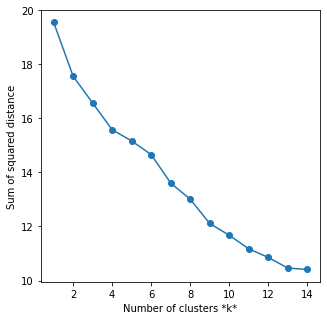

In [195]:
clustering = tor_onehot.drop('Neighborhood', 1)
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(clustering)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(5, 5))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

It can be seen that the beggest change in slope is 5, which we will select

In [196]:
tor_common['1st Most Common Venue'].value_counts()


Coffee Shop                23
Pizza Place                 9
Clothing Store              6
Café                        6
Park                        5
Bakery                      5
Fast Food Restaurant        4
Pharmacy                    3
Baseball Field              3
Grocery Store               3
Gym / Fitness Center        3
Business Service            2
Indian Restaurant           2
Italian Restaurant          2
Bar                         2
Trail                       2
Mexican Restaurant          2
Japanese Restaurant         2
Discount Store              1
Sandwich Place              1
Truck Stop                  1
Lawyer                      1
Curling Ice                 1
Medical Center              1
Airport Service             1
Convenience Store           1
Shopping Mall               1
Department Store            1
Greek Restaurant            1
Portuguese Restaurant       1
American Restaurant         1
Bank                        1
Airport                     1
Dessert Sh

In [197]:
clustering = tor_onehot.drop('Neighborhood', 1)

# set number of clusters
total_bp_clusters = 8

# run k-means clustering
total_bp_kmeans = KMeans(n_clusters=total_bp_clusters, random_state=0).fit(clustering)

# check cluster labels generated for each row in the dataframe
total_bp_kmeans.labels_[0:10]

array([6, 6, 6, 6, 5, 6, 6, 6, 6, 6], dtype=int32)

In [198]:
tor_common.insert(0, 'Cluster Labels', total_bp_kmeans.labels_)

merged_df = total_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
merged_df = merged_df.join(tor_common.set_index('Neighborhood'), on='Neighborhood')
merged_df["Cluster Labels"] = merged_df["Cluster Labels"].fillna(0.0).astype(int)
tor_common.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6,Agincourt,Clothing Store,Lounge,Skating Rink,Breakfast Spot,Latin American Restaurant,Mexican Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
1,6,"Alderwood, Long Branch",Pizza Place,Gym,Sandwich Place,Pub,Coffee Shop,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
2,6,Apple Eaton Centre,Coffee Shop,Clothing Store,Café,Hotel,Japanese Restaurant,Cosmetics Shop,Middle Eastern Restaurant,Ramen Restaurant,Department Store,Theater
3,6,Apple Fairview,Clothing Store,Coffee Shop,Fast Food Restaurant,Shoe Store,Restaurant,Japanese Restaurant,Bank,Toy / Game Store,Juice Bar,Women's Store
4,5,Apple Sherway Gardens,Shopping Mall,College Rec Center,Grocery Store,Park,Fish & Chips Shop,Electronics Store,Metro Station,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop


In [199]:
tor_common['Cluster Labels'].value_counts()


6    79
5    12
1     7
3     5
2     2
0     1
4     1
7     1
Name: Cluster Labels, dtype: int64

In [ ]:
We will now cluster our data. This will provide clusters based on the similarity of neighborhoods to the similarities of neighborhoods which contain phone

In [200]:
# create map
total_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(total_bp_clusters)
ys = [i + x + (i*x)**2 for i in range(total_bp_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged_df['Latitude'], merged_df['Longitude'], merged_df['Neighborhood'], merged_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(total_map)

       
total_map

In [201]:
for lat, lng, label in zip(coords_arcgis['Latitude'], coords_arcgis['Longitude'], coords_arcgis['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.Circle([lat, lng], radius=500, color='white', fill=False).add_to(total_map)

total_map

### Results: 
From the above map it can be seen the neighborhoods that have similar attributes to those containing phone stores. These are mostly the yellow coloured clusters. Now, based on the above clusters, we will now find the best places for google to build its next phone store. Since cluster 6 contains two phone stores, and is surrounded by yellow coloured neighbourhoods, we will use that to find the best place for google to build its next phone retail store. 

In [205]:
cluster_1_df = tor_common[tor_common['Cluster Labels'] ==6].copy()
cluster_1_df.reset_index(inplace=True)
cnt_pot_cf_neighborhood = cluster_1_df['Neighborhood'].count()
print('The number of neighborhoods, which can be a good place for a Pixel Phone store: {}'.format(cnt_pot_cf_neighborhood))
print('They are the following: {}'.format(cluster_1_df['Neighborhood'].values))

The number of neighborhoods, which can be a good place for a Pixel Phone store: 79
They are the following: ['Agincourt' 'Alderwood, Long Branch' 'Apple Eaton Centre'
 'Apple Fairview' 'Apple Yorkdale'
 'Bathurst Manor, Wilson Heights, Downsview North' 'Bayview Village'
 'Bedford Park, Lawrence Manor East' 'Berczy Park' 'Best Buy'
 'Birch Cliff, Cliffside West'
 'Brockton, Parkdale Village, Exhibition Place'
 'CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport'
 'Cedarbrae' 'Central Bay Street' 'Church and Wellesley'
 'Clairville, Humberwood, Woodbine Downs, West Humber, Kipling Heights, Rexdale, Elms, Tandridge, Old Rexdale'
 "Clarks Corners, Tam O'Shanter, Sullivan"
 'Commerce Court, Victoria Hotel' 'Davisville'
 'Del Ray, Mount Dennis, Keelsdale and Silverthorn' 'Don Mills North'
 'Don Mills South' 'Dorset Park, Wexford Heights, Scarborough Town Centre'
 'Dufferin, Dovercourt Village' 'Enclave of L4W' 'Enclave of M4L'
 'Enclave 

### Conclusion/ Discussion
Above are the best places to build a Google retail store. This was a result to be expected, as earlier, by inspection we could see most of the phone retial stores were clustered around Toronto's city point's. Thus, while the above locations are recommended, many of the above locations can be eliminated as they are already close to other Phone retail stores. Whether this is wanted by the client is up to them. Hence, these are the neighborhoods recommended by the algorithm 